<a href="https://colab.research.google.com/github/Poziloi/-math-/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%9610_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D0%A1%D0%BC%D1%8B%D1%81%D0%BB%D0%BE%D0%B2_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №10. Визуализация, анализ и прогнозирование временных рядов

# Блок №1. Теория

## 1. Регистрация и получение API ключа


Перед началом работы с API OpenWeatherMap, вам необходимо зарегистрироваться на сайте OpenWeatherMap и получить API ключ. Этот ключ будет использоваться для аутентификации ваших запросов к API.

In [1]:
API_KEY = "45c86faba28a47ef069c40fdea8bd225"

## 2. Установка необходимых библиотек


Убедитесь, что у вас установлены следующие библиотеки:
```python
pip install requests pandas plotly scikit-learn
```

*(установлены по умолчанию в colab)*

## 3. Получение и обработка данных о погоде
Следующий код демонстрирует, как получить данные о погоде для списка городов и стран:



In [2]:
import requests  # Импорт библиотеки requests для отправки HTTP-запросов
import pandas as pd  # Импорт библиотеки pandas для обработки и анализа данных

API_KEY = "45c86faba28a47ef069c40fdea8bd225"  # Ключ API для доступа к данным OpenWeatherMap
locations = ["Paris,FR", "Berlin,DE", "Moscow,RU"]  # Список мест, для которых вы хотите получить данные о погоде

weather_data_list = []  # Пустой список для хранения данных о погоде

# Цикл по всем местам в списке locations
for location in locations:
    city, country = location.split(',')  # Разделение строки на город и страну
    # Формирование URL для запроса геокодирования
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()  # Отправка запроса и получение ответа в формате JSON
    # Если ответ не пустой
    if geocode_response:
        latitude = geocode_response[0]['lat']  # Получение широты из ответа
        longitude = geocode_response[0]['lon']  # Получение долготы из ответа
        # Формирование URL для запроса прогноза погоды
        forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url).json()['list']  # Отправка запроса и получение данных прогноза
        # Цикл по всем записям в данных прогноза
        for entry in forecast_data:
            # Добавление данных о погоде в список
            weather_data_list.append({
                "city": city,
                "country": country,
                "latitude": latitude,
                "longitude": longitude,
                "datetime": entry['dt_txt'],
                "temperature": entry["main"]["temp"] - 273.15,  # Преобразование температуры из Кельвинов в градусы Цельсия
                "humidity": entry["main"]["humidity"],  # Влажность
                "description": entry["weather"][0]["description"]  # Описание погоды
            })

# Преобразование списка в DataFrame
weather_data = pd.DataFrame(weather_data_list)
# Преобразование строки с датой и временем в объект datetime
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])


In [3]:
weather_data

,city,country,latitude,longitude,datetime,temperature,humidity,description
0,Paris,FR,48.858890,2.320041,2024-05-18 15:00:00,20.27,58,light rain
1,Paris,FR,48.858890,2.320041,2024-05-18 18:00:00,19.19,66,light rain
2,Paris,FR,48.858890,2.320041,2024-05-18 21:00:00,16.59,81,light rain
3,Paris,FR,48.858890,2.320041,2024-05-19 00:00:00,13.80,94,overcast clouds
4,Paris,FR,48.858890,2.320041,2024-05-19 03:00:00,12.80,95,overcast clouds
...,...,...,...,...,...,...,...,...
115,Moscow,RU,55.750446,37.617494,2024-05-23 00:00:00,8.78,54,few clouds
116,Moscow,RU,55.750446,37.617494,2024-05-23 03:00:00,8.14,44,clear sky
117,Moscow,RU,55.750446,37.617494,2024-05-23 06:00:00,11.17,30,clear sky
118,Moscow,RU,55.750446,37.617494,2024-05-23 09:00:00,14.37,25,clear sky


## 4. Визуализация данных
Для визуализации данных о погоде на карте мы можем использовать библиотеку Plotly:


In [4]:
import plotly.express as px  # Импорт модуля plotly.express для создания интерактивных графиков

# Создание диаграммы рассеяния на карте с использованием данных о погоде
fig = px.scatter_mapbox(weather_data,  # Данные для графика
                        lat="latitude",  # Колонка в данных, которая будет использоваться для широты точек на карте
                        lon="longitude",  # Колонка в данных, которая будет использоваться для долготы точек на карте
                        color="temperature",  # Колонка в данных, которая будет использоваться для цвета точек
                        size="humidity",  # Колонка в данных, которая будет использоваться для размера точек
                        hover_name="city",  # Колонка в данных, которая будет отображаться при наведении на точку
                        hover_data=["description"],  # Дополнительные данные, которые будут отображаться при наведении на точку
                        # Создание анимации по времени. Время преобразуется в строку для корректного отображения
                        animation_frame=weather_data['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                        center={"lat": 50, "lon": 14},  # Центр карты при открытии
                        zoom=3,  # Уровень приближения карты при открытии
                        mapbox_style="carto-positron",  # Стиль карты
                        title="Weather Forecast")  # Заголовок графика

fig.show()  # Отображение графика


In [5]:
import requests
import pandas as pd
import plotly.express as px

# Замените на свой API ключ OpenWeatherMap
API_KEY = "45c86faba28a47ef069c40fdea8bd225"

# Список городов и стран для запроса
locations = [
    {"city": "New York", "country": "US"},
    {"city": "Minsk", "country": "BY"},
    {"city": "London", "country": "GB"},
    {"city": "York", "country": "GB"},
    {"city": "Washington", "country": "US"},
    {"city": "Babruysk", "country": "BY"}
    # Добавьте другие города и страны по вашему выбору
]

# Запрос данных о погоде
weather_data = []
for loc in locations:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={loc['city']},{loc['country']}&appid={API_KEY}"
    response = requests.get(url)
    data = response.json()
    weather_data.append({
        "city": loc["city"],
        "country": loc["country"],
        "temperature": data["main"]["temp"] - 273.15,  # Кельвины в Цельсии
        "lon": data["coord"]["lon"],  # Долгота для Scatter plot
        "lat": data["coord"]["lat"],  # Широта для Scatter plot
    })

# Создание DataFrame
df = pd.DataFrame(weather_data)

# Визуализация на тематической карте
fig = px.scatter_geo(
    df,
    lat="lat",
    lon="lon",
    color="temperature",
    hover_name="city",
    title="Температура в разных городах",
    color_continuous_scale="Viridis",
    projection="natural earth"
)

fig.show()


In [6]:
df

,city,country,temperature,lon,lat
0,New York,US,19.20,-74.0060,40.7143
1,Minsk,BY,20.86,27.5667,53.9000
2,London,GB,18.18,-0.1257,51.5085
3,York,GB,20.92,-1.0827,53.9576
4,Washington,US,7.62,-120.5015,47.5001
5,Babruysk,BY,21.49,29.2333,53.1500


# Блок 2. Анализ данных

### Задание №1. Получите прогноз погоды на 5 дней по любым 4 городам

In [7]:
import requests  # Импорт библиотеки requests для отправки HTTP-запросов
import pandas as pd  # Импорт библиотеки pandas для обработки и анализа данных

API_KEY = "45c86faba28a47ef069c40fdea8bd225"  # Ключ API для доступа к данным OpenWeatherMap
locations = ["Minsk,BY", "Babruysk,BY", "Moscow,RU", "Lyubertsy,RU"]  # Список мест, для которых вы хотите получить данные о погоде

weather_data_list = []  # Пустой список для хранения данных о погоде

# Цикл по всем местам в списке locations
for location in locations:
    city, country = location.split(',')  # Разделение строки на город и страну
    # Формирование URL для запроса геокодирования
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()  # Отправка запроса и получение ответа в формате JSON
    # Если ответ не пустой
    if geocode_response:
        latitude = geocode_response[0]['lat']  # Получение широты из ответа
        longitude = geocode_response[0]['lon']  # Получение долготы из ответа
        # Формирование URL для запроса прогноза погоды
        forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url).json()['list']  # Отправка запроса и получение данных прогноза
        # Цикл по всем записям в данных прогноза
        for entry in forecast_data:
            # Добавление данных о погоде в список
            weather_data_list.append({
                "city": city,
                "country": country,
                "latitude": latitude,
                "longitude": longitude,
                "datetime": entry['dt_txt'],
                "temperature": entry["main"]["temp"] - 273.15,  # Преобразование температуры из Кельвинов в градусы Цельсия
                "feels_like": entry["main"]["feels_like"] - 273.15, # Температура по ощущению (с преобразованием)
                "temp_min": entry["main"]["temp_min"] - 273.15, # Минимальная температура (с преобразованием)
                "temp_max": entry["main"]["temp_max"] - 273.15, # Максимальная температура (с преобразованием)
                "pressure": entry["main"]["pressure"],  # Давление
                "humidity": entry["main"]["humidity"],  # Влажность
                "description": entry["weather"][0]["description"]  # Описание погоды
            })

# Преобразование списка в DataFrame
weather_data = pd.DataFrame(weather_data_list)
# Преобразование строки с датой и временем в объект datetime
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

In [8]:
weather_data.head(15)

,city,country,latitude,longitude,datetime,temperature,feels_like,temp_min,temp_max,pressure,humidity,description
0,Minsk,BY,53.902472,27.561823,2024-05-18 15:00:00,20.92,20.69,19.84,20.92,1016,62,light rain
1,Minsk,BY,53.902472,27.561823,2024-05-18 18:00:00,18.97,18.72,15.06,18.97,1016,69,light rain
2,Minsk,BY,53.902472,27.561823,2024-05-18 21:00:00,15.85,15.63,13.31,15.85,1017,82,light rain
3,Minsk,BY,53.902472,27.561823,2024-05-19 00:00:00,12.99,12.75,12.99,12.99,1017,92,broken clouds
4,Minsk,BY,53.902472,27.561823,2024-05-19 03:00:00,12.92,12.62,12.92,12.92,1017,90,overcast clouds
5,Minsk,BY,53.902472,27.561823,2024-05-19 06:00:00,14.95,14.64,14.95,14.95,1017,82,overcast clouds
6,Minsk,BY,53.902472,27.561823,2024-05-19 09:00:00,18.04,17.73,18.04,18.04,1017,70,light rain
7,Minsk,BY,53.902472,27.561823,2024-05-19 12:00:00,18.34,18.08,18.34,18.34,1017,71,moderate rain
8,Minsk,BY,53.902472,27.561823,2024-05-19 15:00:00,18.98,18.71,18.98,18.98,1015,68,moderate rain
9,Minsk,BY,53.902472,27.561823,2024-05-19 18:00:00,14.72,14.39,14.72,14.72,1015,82,light rain


### Задание №2. Вычислите общее среднее значение и стандартное отклонение температуры по всем городам

In [9]:
average_temp = weather_data['temperature'].mean()
std_temp = weather_data['temperature'].std()

print('Средняя температура по всем городам:', average_temp)
print('Стандартное отклонение температуры по всем городам:', std_temp)

Средняя температура по всем городам: 15.967562500000025
Стандартное отклонение температуры по всем городам: 3.7113619102390976


### Задание №3. Визуализируйте распределения температуры по дням. Отдельно по каждому городу (На одной плоскости должно быть четыре графика)


##### Пример визуализации по одному городу:

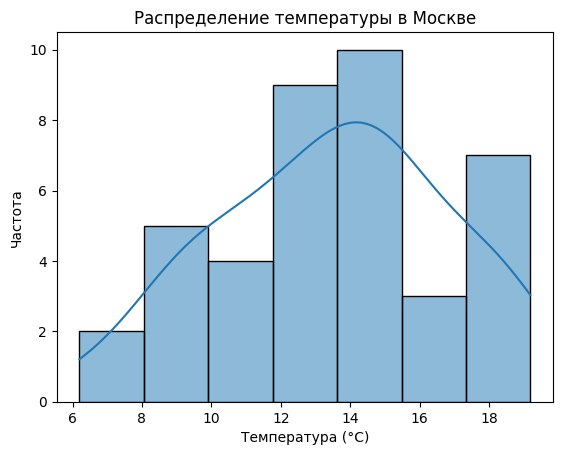

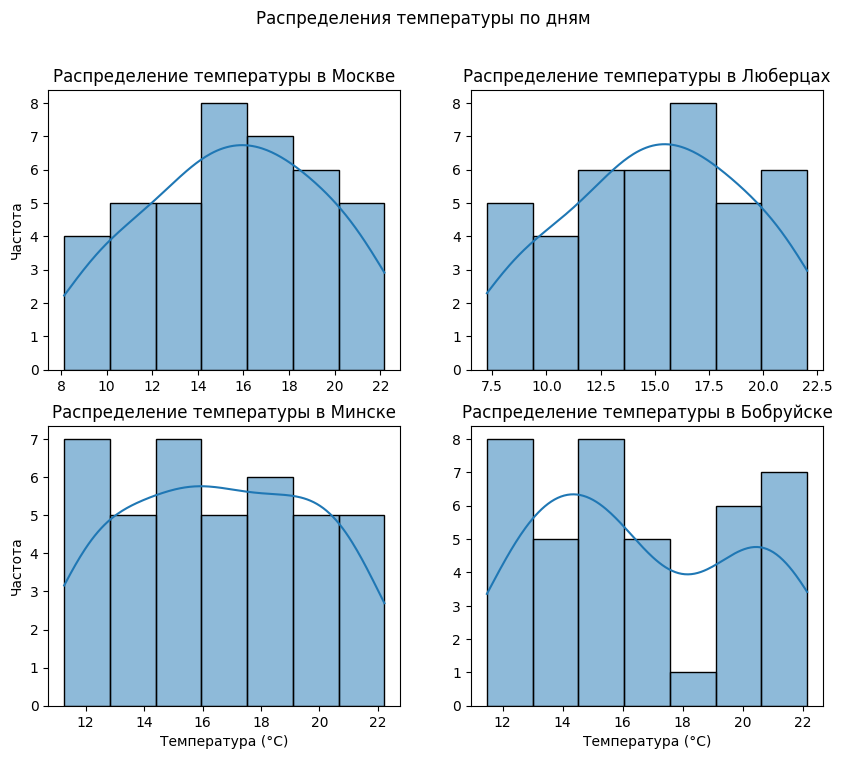

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Распределения температуры по дням')

sns.histplot(ax=axes[0, 0], kde=True, x=weather_data[weather_data['city'] == 'Moscow']['temperature'])
axes[0, 0].set_title('Распределение температуры в Москве')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Частота')

sns.histplot(ax=axes[0, 1], kde=True, x=weather_data[weather_data['city'] == 'Lyubertsy']['temperature'])
axes[0, 1].set_title('Распределение температуры в Люберцах')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')

sns.histplot(ax=axes[1, 0], kde=True, x=weather_data[weather_data['city'] == 'Minsk']['temperature'])
axes[1, 0].set_title('Распределение температуры в Минске')
axes[1, 0].set_xlabel('Температура (°C)')
axes[1, 0].set_ylabel('Частота')

sns.histplot(ax=axes[1, 1], kde=True, x=weather_data[weather_data['city'] == 'Babruysk']['temperature'])
axes[1, 1].set_title('Распределение температуры в Бобруйске')
axes[1, 1].set_xlabel('Температура (°C)')
axes[1, 1].set_ylabel('')

plt.show()

### Задание №4. Визуализируйте Корреляционну матрицу. Отдельно по каждому городу (На одной плоскости должно быть четыре графика). Затем общую корреляционную матрицу по всем данным из набора.


##### Пример визуализации по одному городу:

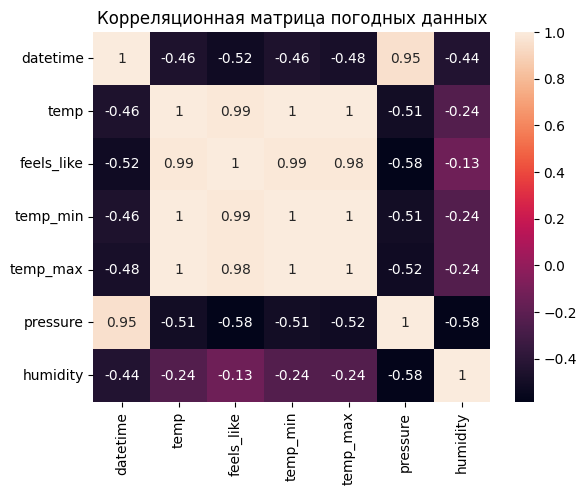

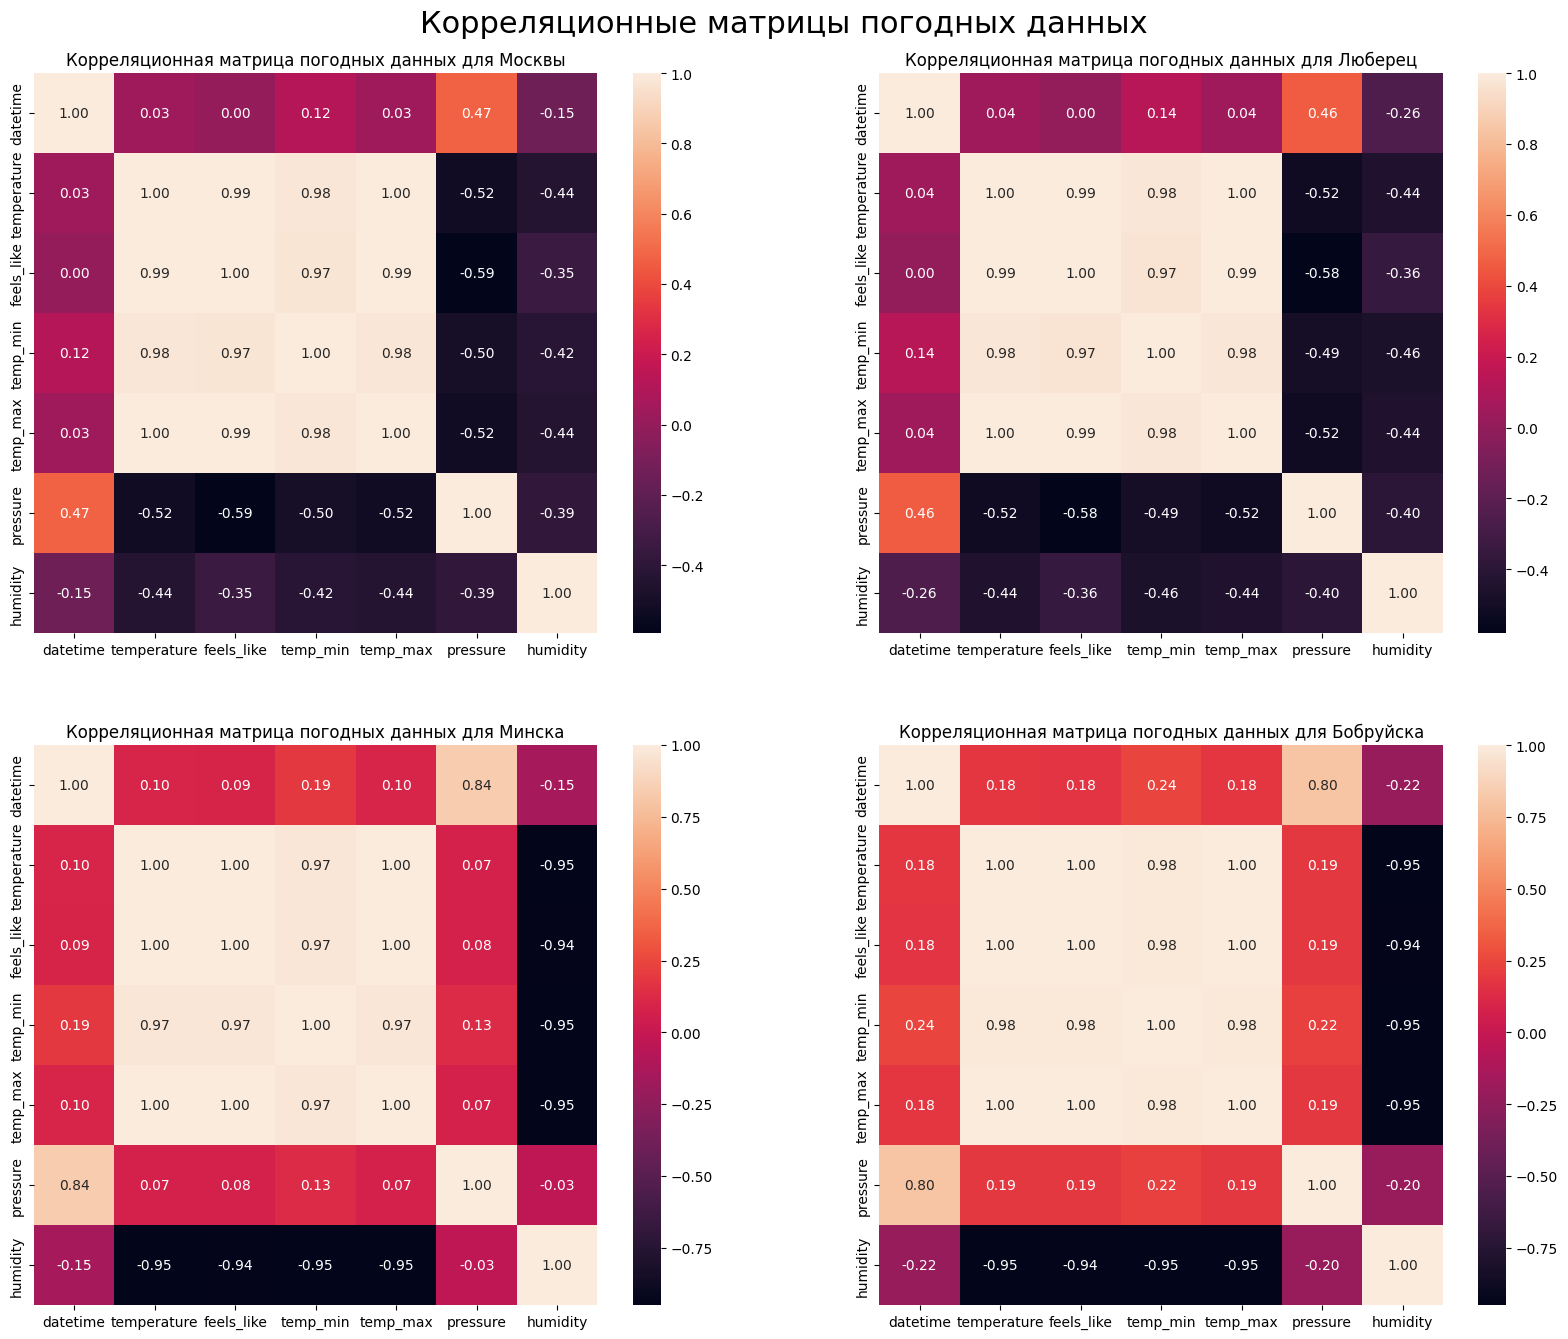

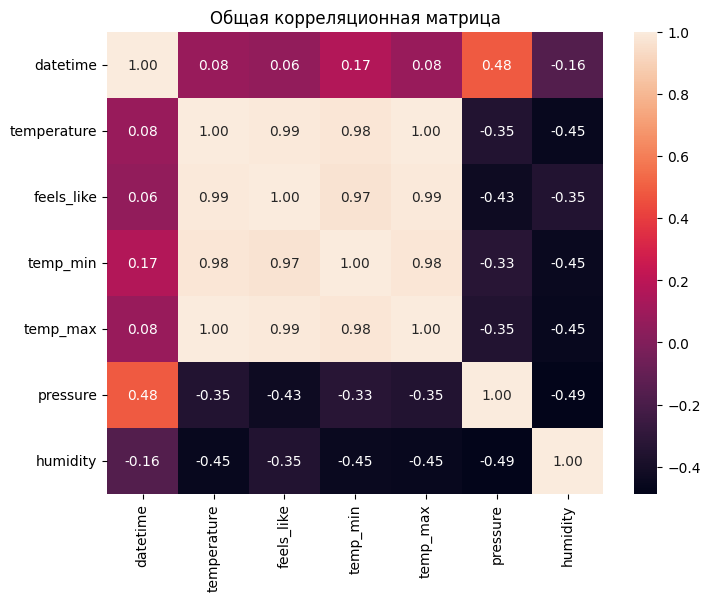

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Корреляционные матрицы погодных данных', y=0.92, fontsize=22)

sns.heatmap(ax=axes[0, 0], data=weather_data[weather_data['city'] == 'Moscow'][['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
axes[0, 0].set_title('Корреляционная матрица погодных данных для Москвы')

sns.heatmap(ax=axes[0, 1], data=weather_data[weather_data['city'] == 'Lyubertsy'][['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
axes[0, 1].set_title('Корреляционная матрица погодных данных для Люберец')

sns.heatmap(ax=axes[1, 0], data=weather_data[weather_data['city'] == 'Minsk'][['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
axes[1, 0].set_title('Корреляционная матрица погодных данных для Минска')

sns.heatmap(ax=axes[1, 1], data=weather_data[weather_data['city'] == 'Babruysk'][['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
axes[1, 1].set_title('Корреляционная матрица погодных данных для Бобруйска')

plt.show()
print('\n')

plt.figure(figsize=(8, 6))
sns.heatmap(data=weather_data[['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
plt.title('Общая корреляционная матрица')

plt.show()

### Задание №5. Визуализируйте тренд изменения температуры со временем. Отдельно по каждому городу (На одной плоскости должно быть четыре графика).

##### Пример визуализации по одному городу:

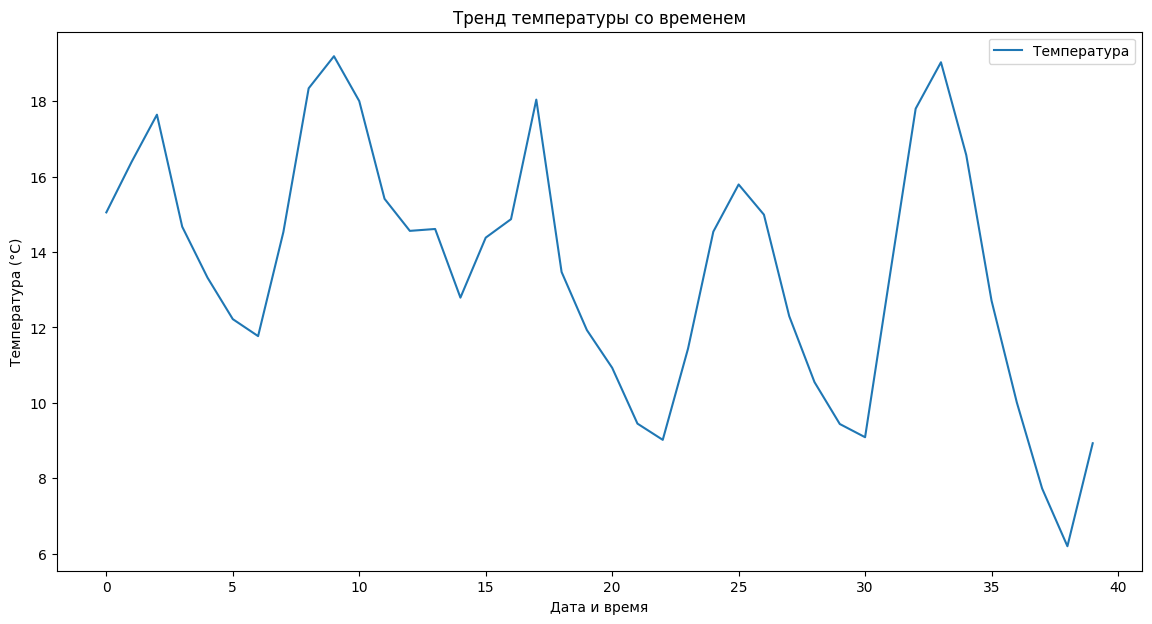

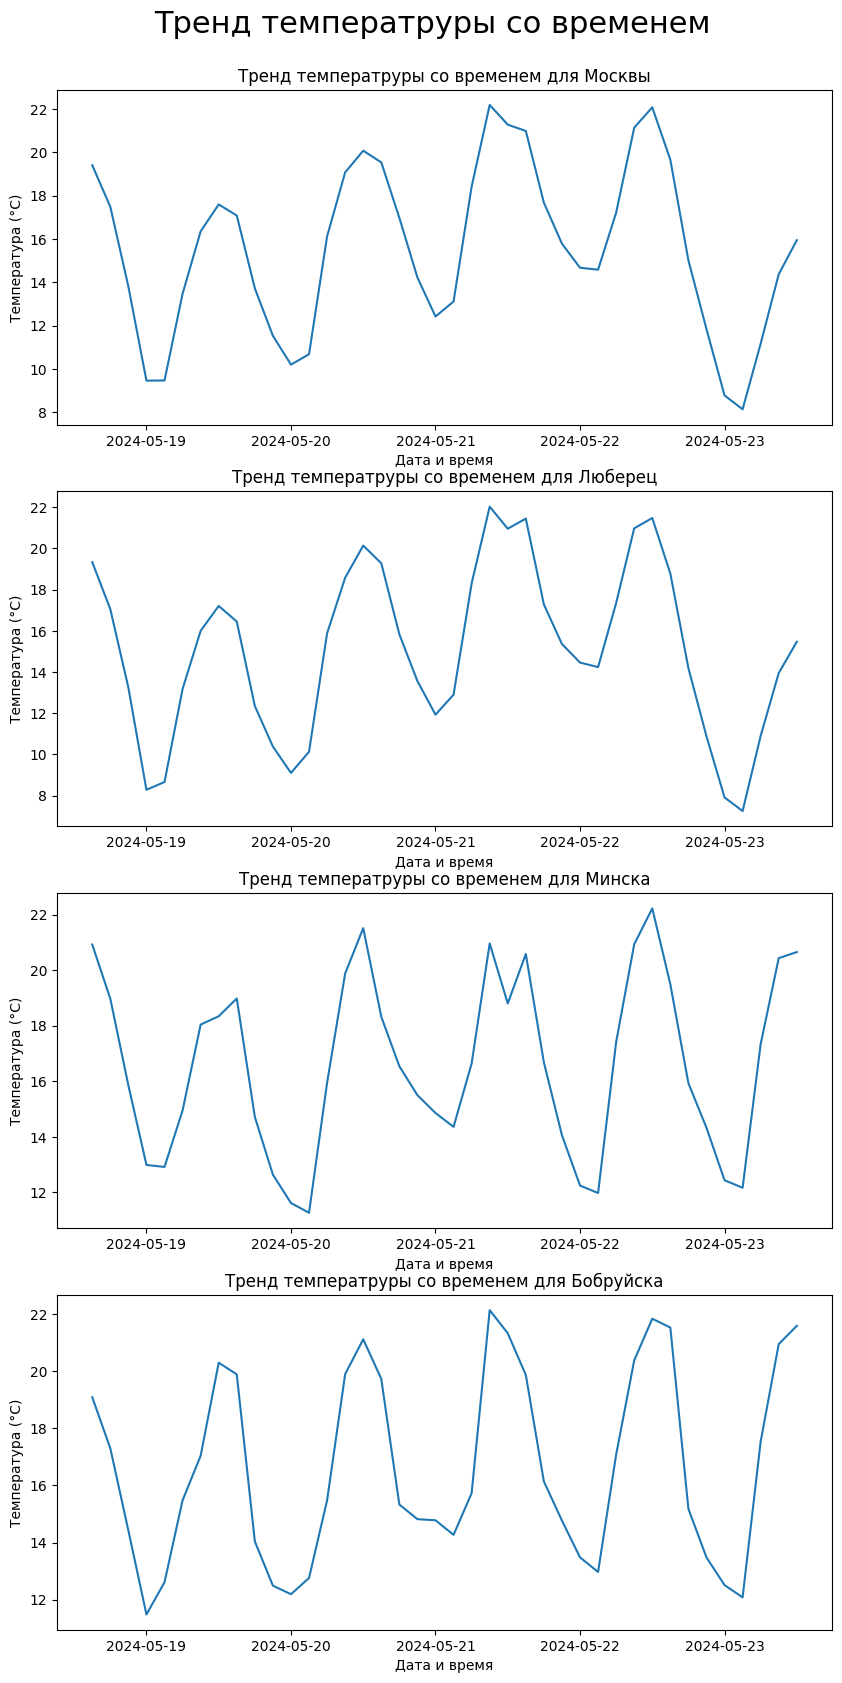

In [12]:
fig, axes = plt.subplots(4, 1, figsize=(10, 20))
fig.suptitle('Тренд температруры со временем', y=0.92, fontsize=22)

sns.lineplot(ax=axes[0], x=weather_data[weather_data['city'] == 'Moscow']['datetime'], y=weather_data[weather_data['city'] == 'Moscow']['temperature'])
axes[0].set_title('Тренд температруры со временем для Москвы')
axes[0].set_xlabel('Дата и время')
axes[0].set_ylabel('Температура (°C)')

sns.lineplot(ax=axes[1], x=weather_data[weather_data['city'] == 'Lyubertsy']['datetime'], y=weather_data[weather_data['city'] == 'Lyubertsy']['temperature'])
axes[1].set_title('Тренд температруры со временем для Люберец')
axes[1].set_xlabel('Дата и время')
axes[1].set_ylabel('Температура (°C)')

sns.lineplot(ax=axes[2], x=weather_data[weather_data['city'] == 'Minsk']['datetime'], y=weather_data[weather_data['city'] == 'Minsk']['temperature'])
axes[2].set_title('Тренд температруры со временем для Минска')
axes[2].set_xlabel('Дата и время')
axes[2].set_ylabel('Температура (°C)')

sns.lineplot(ax=axes[3], x=weather_data[weather_data['city'] == 'Babruysk']['datetime'], y=weather_data[weather_data['city'] == 'Babruysk']['temperature'])
axes[3].set_title('Тренд температруры со временем для Бобруйска')
axes[3].set_xlabel('Дата и время')
axes[3].set_ylabel('Температура (°C)')

plt.show()

### Задание №6.1. Отобразите среднюю дневную (с 04:00 до 23:00) температуру для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

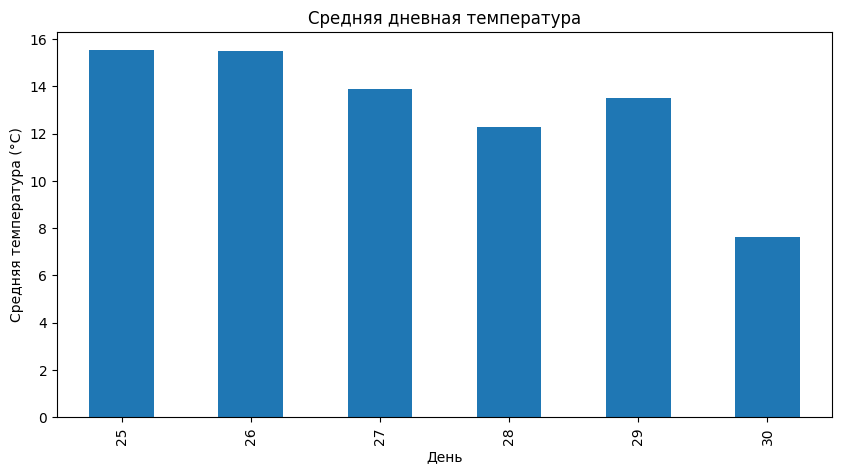

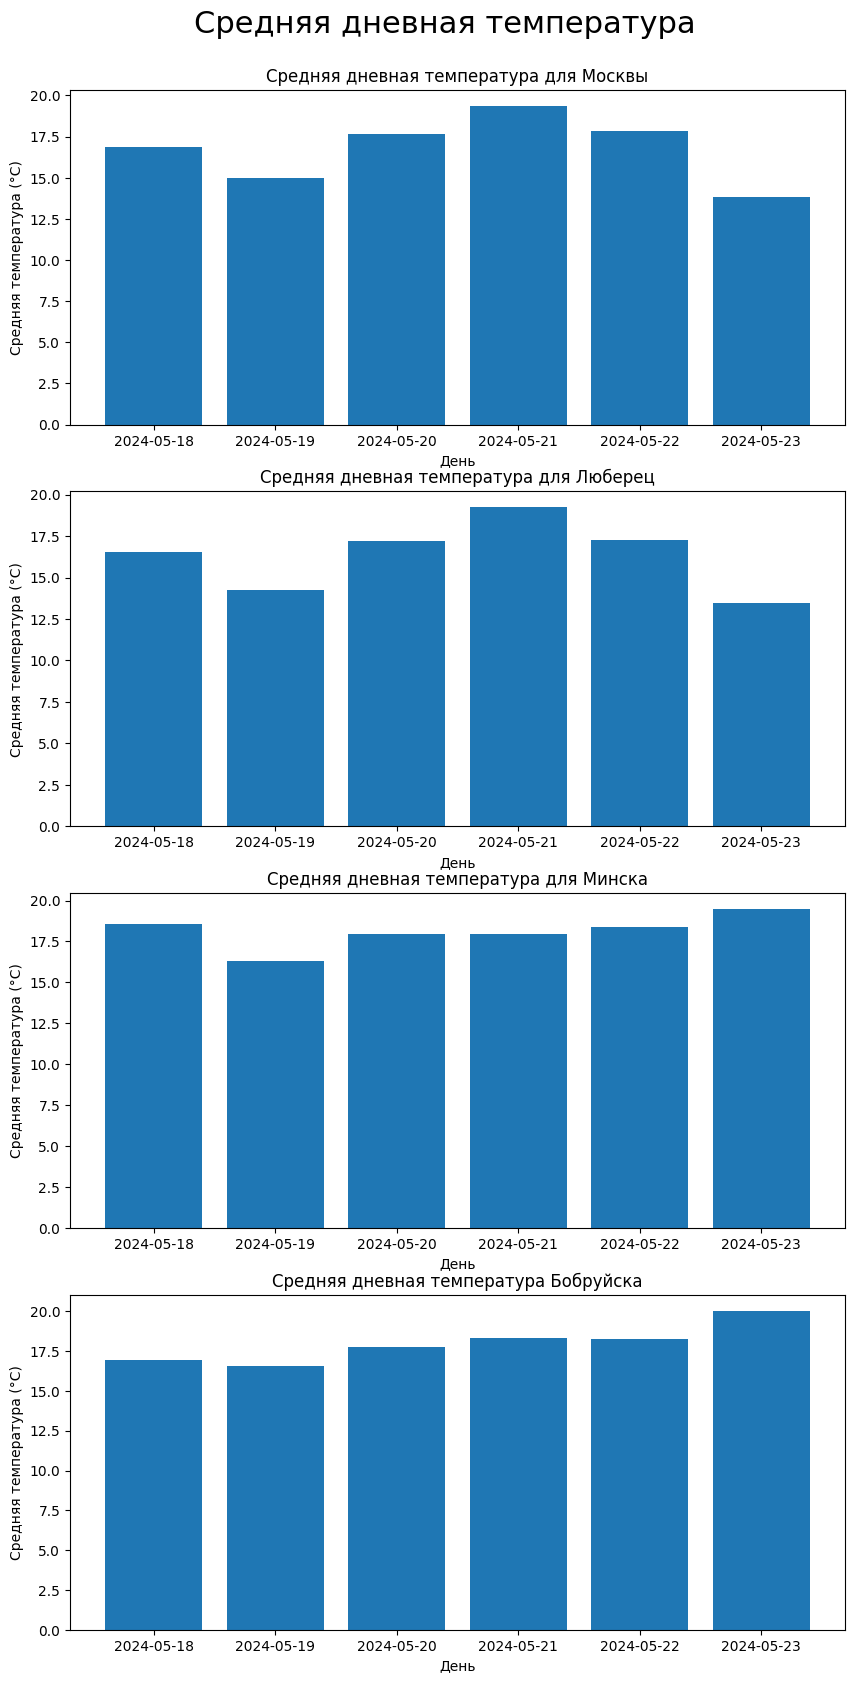

In [13]:
filtered_data = weather_data[(weather_data['datetime'].dt.hour >= 4) & (weather_data['datetime'].dt.hour <= 23)]

mean_daily_temperature_per_city = filtered_data.groupby(['city', filtered_data['datetime'].dt.date])['temperature'].mean().reset_index(name='mean_temp')

fig, axes = plt.subplots(4, 1, figsize=(10, 20))
fig.suptitle('Средняя дневная температура', y=0.92, fontsize=22)

axes[0].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Moscow']['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Moscow']['mean_temp'])
axes[0].set_title('Средняя дневная температура для Москвы')
axes[0].set_xlabel('День')
axes[0].set_ylabel('Средняя температура (°C)')

axes[1].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Lyubertsy']['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Lyubertsy']['mean_temp'])
axes[1].set_title('Средняя дневная температура для Люберец')
axes[1].set_xlabel('День')
axes[1].set_ylabel('Средняя температура (°C)')

axes[2].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Minsk']['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Minsk']['mean_temp'])
axes[2].set_title('Средняя дневная температура для Минска')
axes[2].set_xlabel('День')
axes[2].set_ylabel('Средняя температура (°C)')

axes[3].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Babruysk']['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Babruysk']['mean_temp'])
axes[3].set_title('Средняя дневная температура Бобруйска')
axes[3].set_xlabel('День')
axes[3].set_ylabel('Средняя температура (°C)')

plt.show()

### Задание №6.2. Отобразите среднюю дневную (с 04:00 до 23:00) и ночную (с 23:00 до 04:00) температуру для каждого города (На одной плоскости должно быть четыре графика):

In [14]:
filtered_data = weather_data[(weather_data['datetime'].dt.hour >= 4) & (weather_data['datetime'].dt.hour < 23)]

mean_daily_temperature_per_city = filtered_data.groupby(['city', filtered_data['datetime'].dt.date])['temperature'].mean().reset_index(name='mean_day_temp')

filtered_data = weather_data[(weather_data['datetime'].dt.hour >= 0) & (weather_data['datetime'].dt.hour <= 3)]

mean_nightly_temperature_per_city = filtered_data.groupby(['city', filtered_data['datetime'].dt.date])['temperature'].mean().reset_index(name='mean_night_temp')

mean_daily_temperature_per_city['mean_night_temp'] = mean_nightly_temperature_per_city['mean_night_temp']

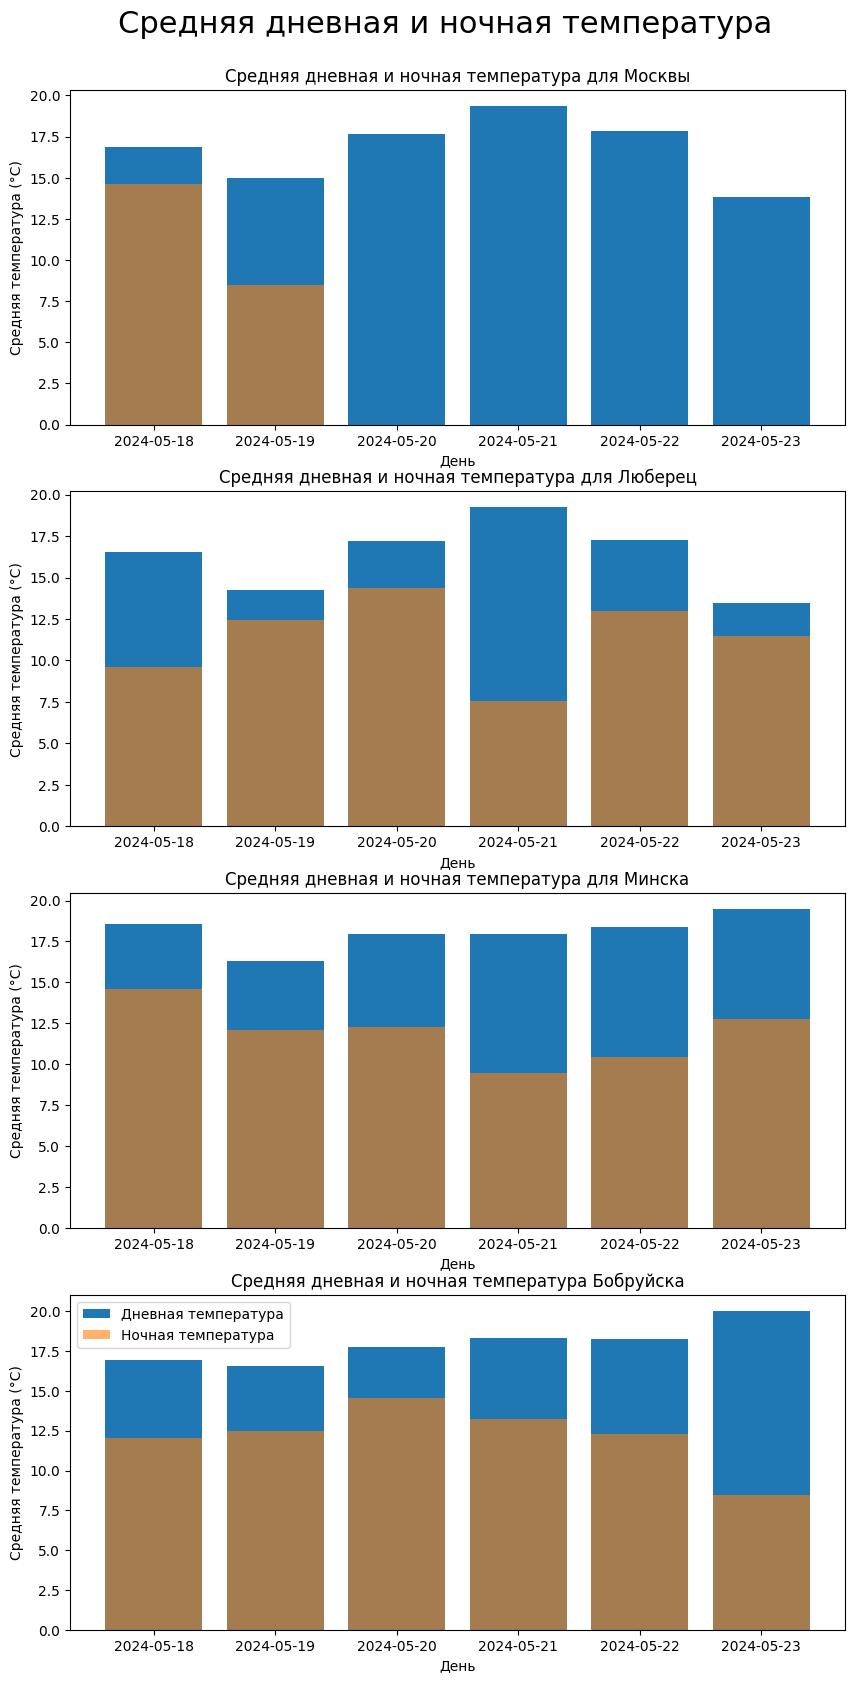

In [15]:
fig, axes = plt.subplots(4, 1, figsize=(10, 20))
fig.suptitle('Средняя дневная и ночная температура', y=0.92, fontsize=22)

axes[0].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Moscow']['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Moscow']['mean_day_temp'], label='Дневная температура')
axes[0].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Moscow']['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Moscow']['mean_night_temp'], label='Ночная температура', alpha=0.6)
axes[0].set_title('Средняя дневная и ночная температура для Москвы')
axes[0].set_xlabel('День')
axes[0].set_ylabel('Средняя температура (°C)')

axes[1].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Lyubertsy']['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Lyubertsy']['mean_day_temp'], label='Дневная температура')
axes[1].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Lyubertsy']['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Lyubertsy']['mean_night_temp'], label='Ночная температура', alpha=0.6)
axes[1].set_title('Средняя дневная и ночная температура для Люберец')
axes[1].set_xlabel('День')
axes[1].set_ylabel('Средняя температура (°C)')

axes[2].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Minsk']['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Minsk']['mean_day_temp'], label='Дневная температура')
axes[2].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Minsk']['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Minsk']['mean_night_temp'], label='Ночная температура', alpha=0.6)
axes[2].set_title('Средняя дневная и ночная температура для Минска')
axes[2].set_xlabel('День')
axes[2].set_ylabel('Средняя температура (°C)')

axes[3].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Babruysk']['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Babruysk']['mean_day_temp'], label='Дневная температура')
axes[3].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Babruysk']['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Babruysk']['mean_night_temp'], label='Ночная температура', alpha=0.6)
axes[3].set_title('Средняя дневная и ночная температура Бобруйска')
axes[3].set_xlabel('День')
axes[3].set_ylabel('Средняя температура (°C)')

plt.legend()
plt.show()

### Задание №7. Постройте точечный график зависимости температуры от влажности для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

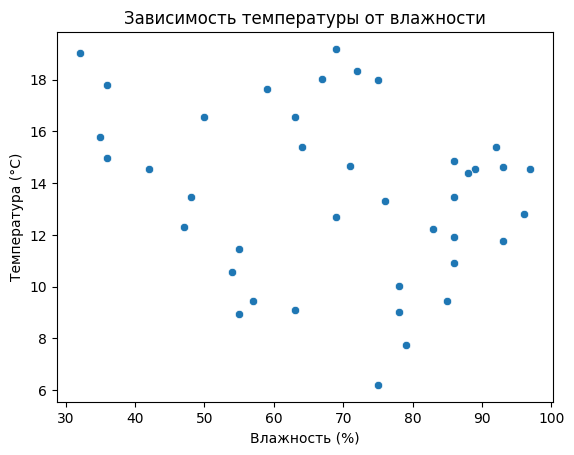

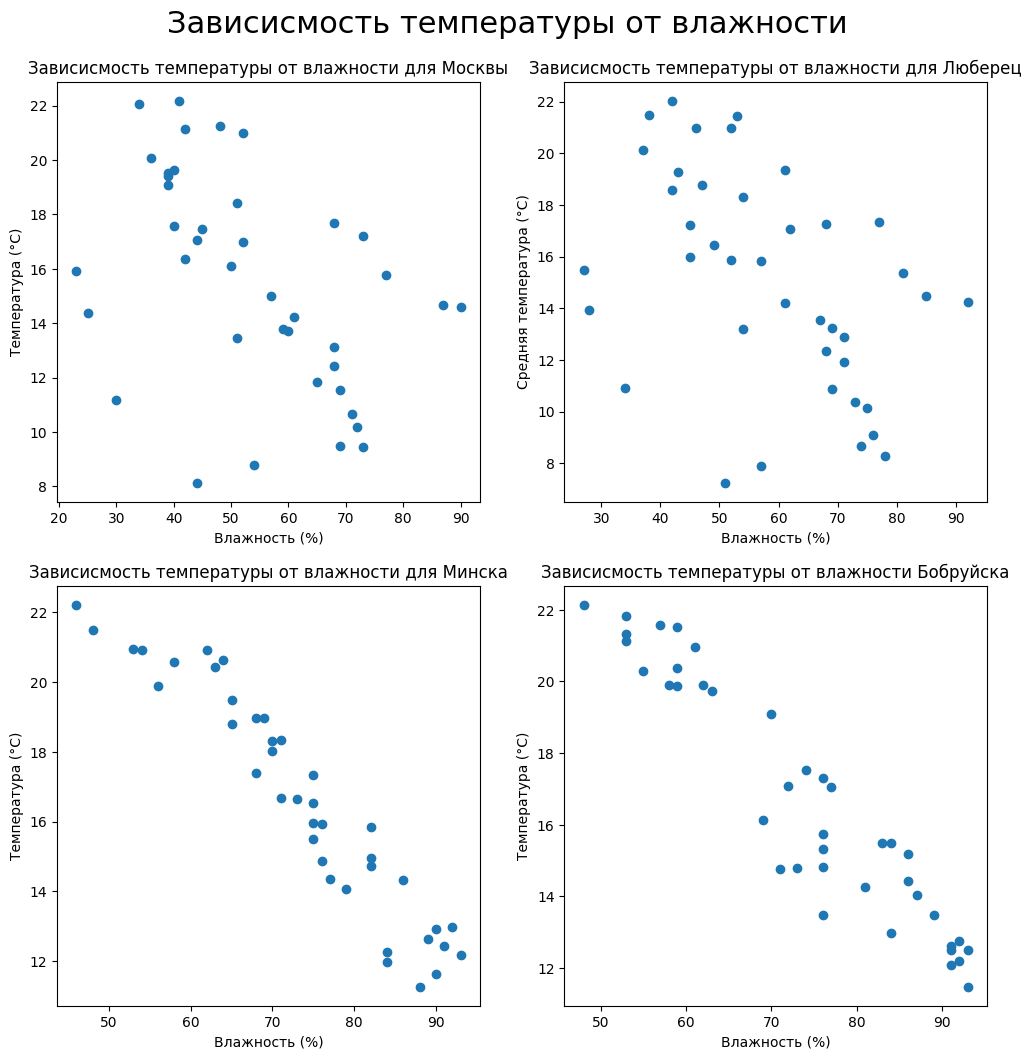

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Зависисмость температуры от влажности', y=0.94, fontsize=22)

axes[0, 0].scatter(weather_data[weather_data['city'] == 'Moscow']['humidity'], weather_data[weather_data['city'] == 'Moscow']['temperature'])
axes[0, 0].set_title('Зависисмость температуры от влажности для Москвы')
axes[0, 0].set_xlabel('Влажность (%)')
axes[0, 0].set_ylabel('Температура (°C)')

axes[0, 1].scatter(weather_data[weather_data['city'] == 'Lyubertsy']['humidity'], weather_data[weather_data['city'] == 'Lyubertsy']['temperature'])
axes[0, 1].set_title('Зависисмость температуры от влажности для Люберец')
axes[0, 1].set_xlabel('Влажность (%)')
axes[0, 1].set_ylabel('Средняя температура (°C)')

axes[1, 0].scatter(weather_data[weather_data['city'] == 'Minsk']['humidity'], weather_data[weather_data['city'] == 'Minsk']['temperature'])
axes[1, 0].set_title('Зависисмость температуры от влажности для Минска')
axes[1, 0].set_xlabel('Влажность (%)')
axes[1, 0].set_ylabel('Температура (°C)')

axes[1, 1].scatter(weather_data[weather_data['city'] == 'Babruysk']['humidity'], weather_data[weather_data['city'] == 'Babruysk']['temperature'])
axes[1, 1].set_title('Зависисмость температуры от влажности Бобруйска')
axes[1, 1].set_xlabel('Влажность (%)')
axes[1, 1].set_ylabel('Температура (°C)')

plt.show()

### Задание №8. Отобразите среднюю почасовую температуру для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

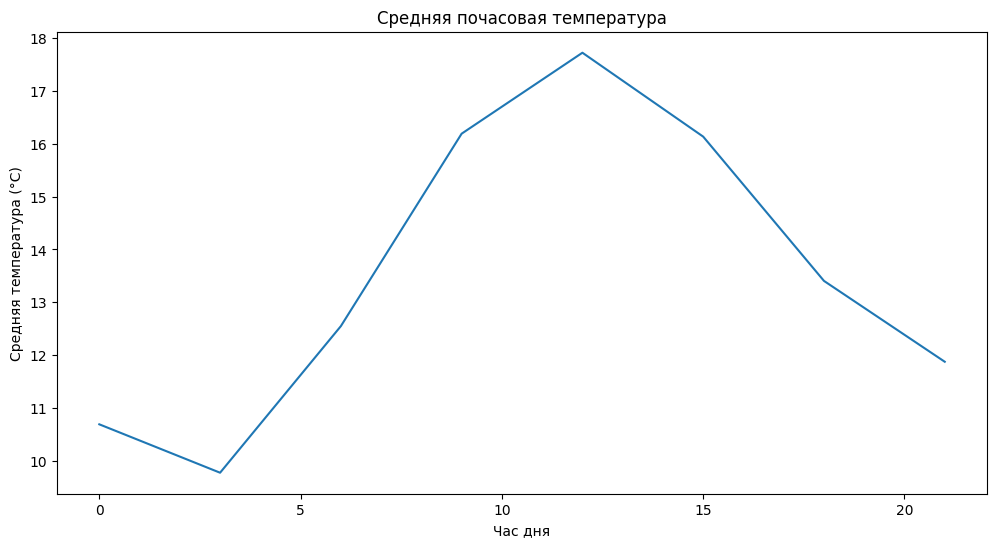

In [17]:
hourly_mean_temperature = weather_data.groupby([weather_data['city'], weather_data['datetime'].dt.hour])['temperature'].mean().reset_index()
hourly_mean_temperature.columns = ['city', 'hour', 'mean_temperature']

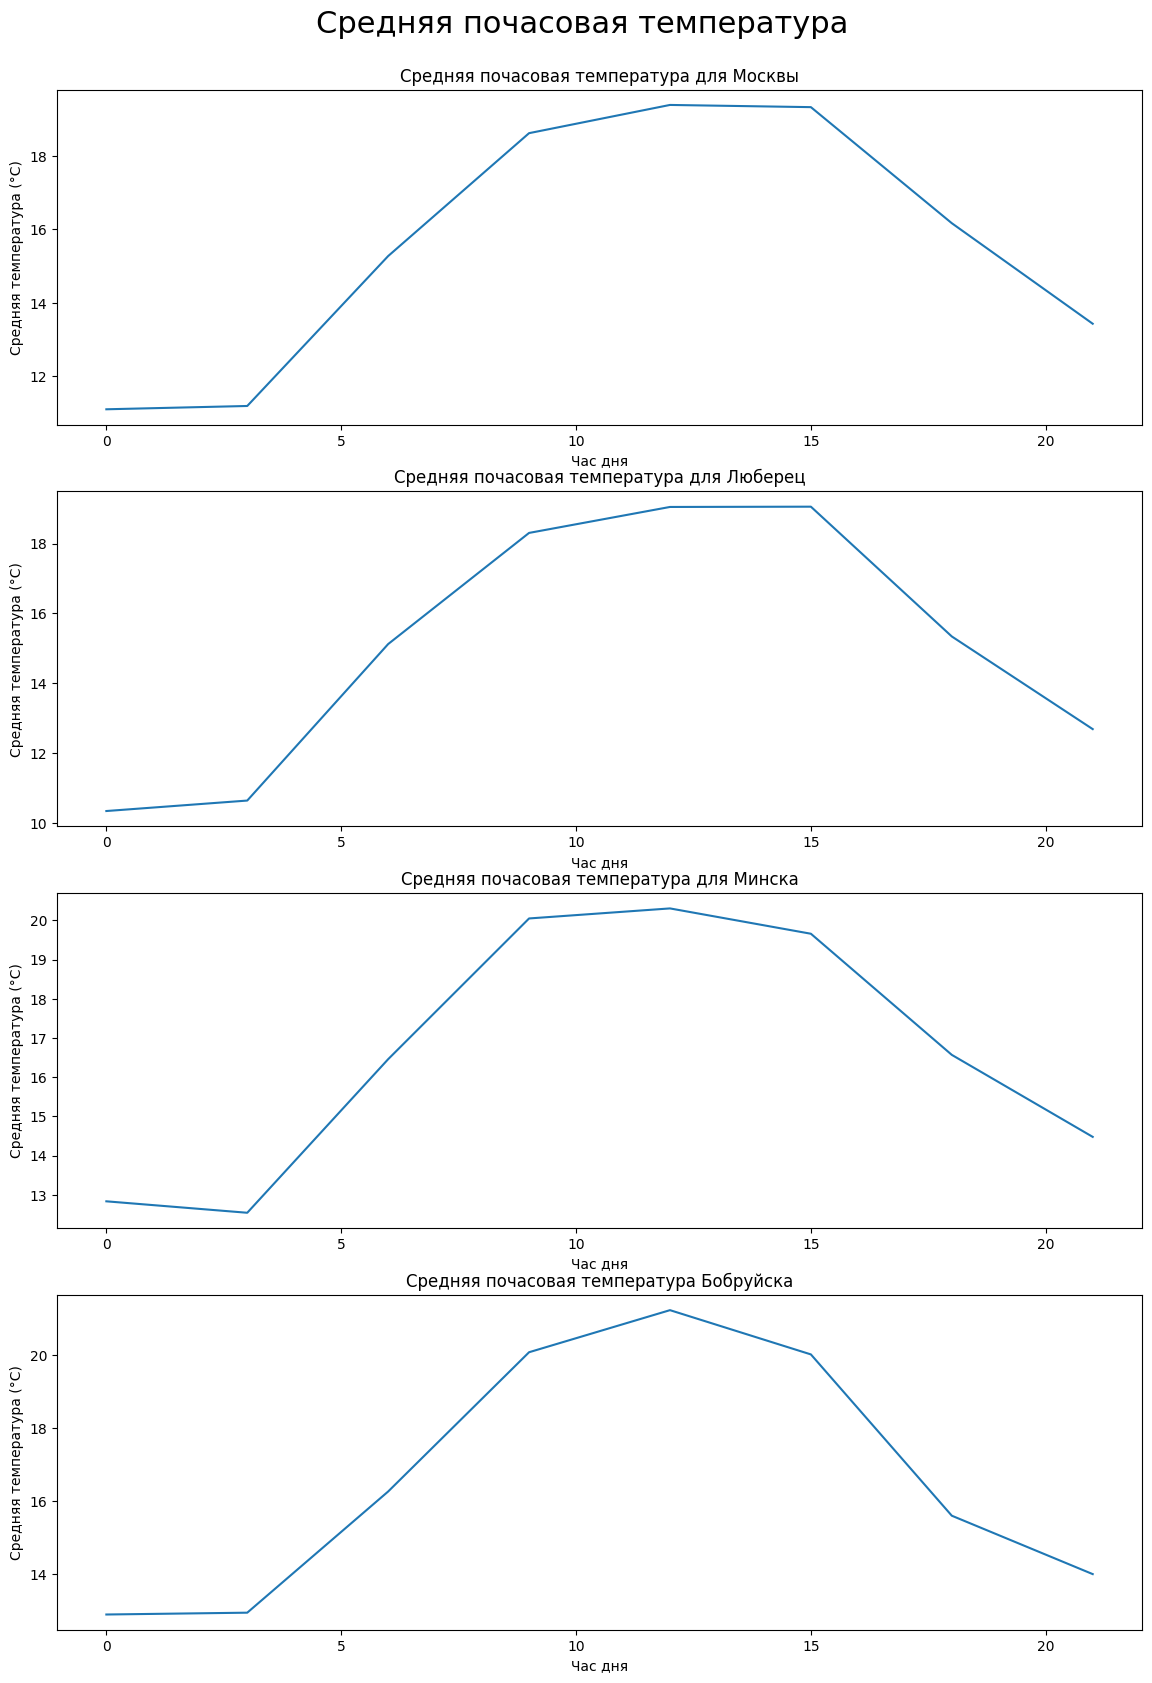

In [18]:
fig, axes = plt.subplots(4, 1, figsize=(14, 20))
fig.suptitle('Средняя почасовая температура', y=0.92, fontsize=22)

axes[0].plot(hourly_mean_temperature[hourly_mean_temperature['city'] == 'Moscow']['hour'], hourly_mean_temperature[hourly_mean_temperature['city'] == 'Moscow']['mean_temperature'])
axes[0].set_title('Средняя почасовая температура для Москвы')
axes[0].set_xlabel('Час дня')
axes[0].set_ylabel('Средняя температура (°C)')

axes[1].plot(hourly_mean_temperature[hourly_mean_temperature['city'] == 'Lyubertsy']['hour'], hourly_mean_temperature[hourly_mean_temperature['city'] == 'Lyubertsy']['mean_temperature'])
axes[1].set_title('Средняя почасовая температура для Люберец')
axes[1].set_xlabel('Час дня')
axes[1].set_ylabel('Средняя температура (°C)')

axes[2].plot(hourly_mean_temperature[hourly_mean_temperature['city'] == 'Minsk']['hour'], hourly_mean_temperature[hourly_mean_temperature['city'] == 'Minsk']['mean_temperature'])
axes[2].set_title('Средняя почасовая температура для Минска')
axes[2].set_xlabel('Час дня')
axes[2].set_ylabel('Средняя температура (°C)')

axes[3].plot(hourly_mean_temperature[hourly_mean_temperature['city'] == 'Babruysk']['hour'], hourly_mean_temperature[hourly_mean_temperature['city'] == 'Babruysk']['mean_temperature'])
axes[3].set_title('Средняя почасовая температура Бобруйска')
axes[3].set_xlabel('Час дня')
axes[3].set_ylabel('Средняя температура (°C)')

plt.show()

# Блок 3. Прогнозирование

### Интегрируйте Вашу реализацию модели линейной регрессии из предыдущих работ:

In [19]:
import numpy as np

class LinearRegression:
  def __init__(self):
    self.theta = None

  def fit(self, X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    self.theta = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

  def predict(self, X):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(self.theta)

  def score(self, X, y):
    y_pred = self.predict(X)
    SSres = np.sum((y - y_pred) ** 2)
    SStot = np.sum((y - np.mean(y)) ** 2)
    return 1 - SSres / SStot

In [20]:
model = LinearRegression()

X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([2, 3, 5])

model.fit(X, y)
y_pred = model.predict(X)
r_squared = model.score(X, y)

print("Коэффициенты линейной регрессии: ", model.theta)
print("Предсказание: ", y_pred)
print("Коэффициент детерминации R^2: ", r_squared)

Коэффициенты линейной регрессии:  [0.47222222 0.13888889 0.61111111]
Предсказание:  [1.83333333 3.33333333 4.83333333]
Коэффициент детерминации R^2:  0.9642857142857143


### Задание №1. Обучите модель регрессии предсказывать погоду на будущее (остальные признаки на будущее также вычисляются с помощью регрессии):

In [21]:
from sklearn.model_selection import train_test_split

params = ['temperature', 'feels_like', 'temp_min', 'temp_max', 'humidity', 'pressure']
scores = []
y_pred = []
models = []
for i in range(len(params)):
  param = params[i]
  new_params = params[:i] + params[i+1:]
  X = weather_data[new_params]
  y = weather_data[param]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred.append(model.predict(X_test))
  score = model.score(X_test, y_test)
  scores.append(score)
  models.append(model)

Выведите оценку точности:

In [22]:
for i in range(len(scores)):
  print(f'Score of the model: {scores[i]} for {params[i]}')

Score of the model: 1.0 for temperature
Score of the model: 0.9997698573365906 for feels_like
Score of the model: 0.9918932293841023 for temp_min
Score of the model: 1.0 for temp_max
Score of the model: 0.9691087539819575 for humidity
Score of the model: -0.05332765230276881 for pressure


In [23]:
pred_data = []
for i in range(len(params)):
  param = params[i]
  new_params = params[:i] + params[i+1:]
  X = weather_data[new_params]
  pred_data.append(models[i].predict(X))

pred_weather = pd.DataFrame()
pred_weather['temperature'] = pred_data[0]
pred_weather['feels_like'] = pred_data[1]
pred_weather['temp_min'] = pred_data[2]
pred_weather['temp_max'] = pred_data[3]
pred_weather['humidity'] = pred_data[4]
pred_weather['pressure'] = pred_data[5]

In [24]:
pred_weather

,temperature,feels_like,temp_min,temp_max,humidity,pressure
0,20.92,20.785283,20.463367,20.92,60.208378,1017.395777
1,18.97,18.797069,18.542580,18.97,66.926610,1016.765638
2,15.85,15.659431,15.537640,15.85,79.794796,1016.999916
3,12.99,12.737023,12.718712,12.99,91.300211,1017.834512
4,12.92,12.602466,12.634053,12.92,89.962294,1018.178682
...,...,...,...,...,...,...
155,7.91,5.983965,7.893820,7.91,32.054746,1027.575152
156,7.25,5.060193,7.298352,7.25,35.563604,1028.503256
157,10.90,8.663394,10.926941,10.90,42.756651,1027.832079
158,13.95,11.903329,14.021398,13.95,33.738359,1026.933409


### Задание №2. Обучите модель регрессии предсказывать погоду на будущее, вспомогательные признаки для прогноза должны передаваться пользователем:

(Модель получает на вход признаки за предыдущие дни, затем значения признаков за будущие дни и возвращает погоду на будущие дни)

In [25]:
params = ['temperature', 'feels_like', 'temp_min', 'temp_max', 'humidity', 'pressure']
scores = []
y_pred = []
models = []
for i in range(len(params)):
  param = params[i]
  new_params = params[:i] + params[i+1:]
  X_train = weather_data[new_params] # За предыдущие дни
  y_train = weather_data[param] # За предыдущие дни
  X_test = pred_weather[new_params] # За будующие дни
  y_test = pred_weather[param] # За будующие дни

  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred.append(model.predict(X_test))
  score = model.score(X_test, y_test)
  scores.append(score)
  models.append(model)

future_pred_weather = pd.DataFrame()
start_date = weather_data['datetime'].max().date()
time_offsets = pd.date_range(start='00:00', end='21:00', freq='3H').time
datetime_list = []
num_days = 5
for day in range(num_days):
  current_date = start_date + pd.Timedelta(days=day)
  for time in time_offsets:
    datetime_list.append(pd.Timestamp.combine(current_date, time))
datetime_list = datetime_list * 4

future_pred_weather['city'] = weather_data['city']
future_pred_weather['country'] = weather_data['country']
future_pred_weather['latitude'] = weather_data['latitude']
future_pred_weather['longitude'] = weather_data['longitude']
future_pred_weather['datetime'] = datetime_list
future_pred_weather['temperature'] = y_pred[0]
future_pred_weather['feels_like'] = y_pred[1]
future_pred_weather['temp_min'] = y_pred[2]
future_pred_weather['temp_max'] = y_pred[3]
future_pred_weather['humidity'] = y_pred[4]
future_pred_weather['pressure'] = y_pred[5]
future_pred_weather['description'] = weather_data['description']

Выведите оценку точности:

In [26]:
for i in range(len(scores)):
  print(f'Score of the model: {scores[i]} for {params[i]}')

Score of the model: 1.0 for temperature
Score of the model: 0.9990909833104011 for feels_like
Score of the model: 0.9986102159316258 for temp_min
Score of the model: 1.0 for temp_max
Score of the model: 0.9429156597624746 for humidity
Score of the model: 0.9662175563649582 for pressure


In [27]:
future_pred_weather

,city,country,latitude,longitude,datetime,temperature,feels_like,temp_min,temp_max,humidity,pressure,description
0,Minsk,BY,53.902472,27.561823,2024-05-23 00:00:00,20.92,20.713132,20.633694,20.92,61.963497,1017.523728,light rain
1,Minsk,BY,53.902472,27.561823,2024-05-23 03:00:00,18.97,18.725963,18.674299,18.97,69.126388,1017.707329,light rain
2,Minsk,BY,53.902472,27.561823,2024-05-23 06:00:00,15.85,15.596051,15.595408,15.85,81.053966,1017.724010,light rain
3,Minsk,BY,53.902472,27.561823,2024-05-23 09:00:00,12.99,12.713972,12.796394,12.99,90.289821,1017.821854,broken clouds
4,Minsk,BY,53.902472,27.561823,2024-05-23 12:00:00,12.92,12.595438,12.733859,12.92,88.536351,1018.085398,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...
155,Lyubertsy,RU,55.678314,37.893770,2024-05-27 09:00:00,7.91,5.293239,7.782509,7.91,57.578658,1028.896777,few clouds
156,Lyubertsy,RU,55.678314,37.893770,2024-05-27 12:00:00,7.25,4.646224,7.176221,7.25,52.235171,1029.186507,clear sky
157,Lyubertsy,RU,55.678314,37.893770,2024-05-27 15:00:00,10.90,8.935134,10.877228,10.90,36.645408,1026.861954,clear sky
158,Lyubertsy,RU,55.678314,37.893770,2024-05-27 18:00:00,13.95,12.099902,13.874456,13.95,30.292766,1026.249804,clear sky


### Задание №3. Создайте новый датафрейм. Добавьте туда начальные значения температуры и предсказанные, а затем визуализируйте результаты на интерактивном таймфрейме по всем городам:

##### Пример визуализации:

In [28]:
import plotly.express as px

new_weather_data = pd.concat([weather_data, future_pred_weather], ignore_index=True)

fig = px.scatter_mapbox(new_weather_data,  # Данные для графика
                        lat="latitude",  # Колонка в данных, которая будет использоваться для широты точек на карте
                        lon="longitude",  # Колонка в данных, которая будет использоваться для долготы точек на карте
                        color="temperature",  # Колонка в данных, которая будет использоваться для цвета точек
                        size="humidity",  # Колонка в данных, которая будет использоваться для размера точек
                        hover_name="city",  # Колонка в данных, которая будет отображаться при наведении на точку
                        hover_data=["description"],  # Дополнительные данные, которые будут отображаться при наведении на точку
                        # Создание анимации по времени. Время преобразуется в строку для корректного отображения
                        animation_frame=new_weather_data['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                        center={"lat": 50, "lon": 14},  # Центр карты при открытии
                        zoom=3,  # Уровень приближения карты при открытии
                        mapbox_style="carto-positron",  # Стиль карты
                        title="Прогноз погоды с предсказанием")  # Заголовок графика

fig.show()

## Задание №4. Выберите несколько стран, получите прогноз погоды по каждой их них, после чего сформируйте предскзания погоды на будущее и отобразите её в виде таймфрейма, используя px.choropleth() (тематическая карта)

#### Пример использования px.choropleth()

Этот код используется для создания тематической (хороплетной) карты.

* `px.choropleth()` - это функция, которая создает хороплетную карту. В данном случае, она принимает следующие аргументы:

- `gapminder` - набор данных, который будет использоваться для построения карты.
- `locations="iso_alpha"` - указывает на столбец данных, который будет использоваться для определения местоположений на карте. В данном случае, значения из столбца `iso_alpha` будут использоваться для определения местоположений.
- `color="lifeExp"` - указывает на столбец данных, который будет определять цвета на карте. В данном случае, значения из столбца `lifeExp` будут использоваться для определения цвета.
- `hover_name="country"` - указывает на столбец данных, который будет отображаться при наведении на местоположение на карте. В данном случае, значения из столбца `country` будут отображаться при наведении.
- `animation_frame="year"` - указывает на столбец данных, который будет использоваться для создания анимации на карте. В данном случае, значения из столбца `year` будут использоваться для создания анимации, показывая изменения со временем.
- `color_continuous_scale=px.colors.sequential.Plasma` - указывает на цветовую палитру, которая будет использоваться для отображения данных на карте. В данном случае, используется палитра Plasma из библиотеки Plotly Express.
- `projection="natural earth"` - указывает на проекцию карты. В данном случае, используется глобальная проекция карты "natural earth".

В итоге, данный код создаст тематическую (хороплетную) карту, на которой каждое местоположение будет отображаться цветом, соответствующим значению из столбца `lifeExp`. При наведении на каждое местоположение будет отображаться страна из столбца `country`. Карта будет анимированной, показывая изменения со временем, используя значения из столбца `year`. Цвета на карте будут использовать цветовую палитру Plasma, а проекция карты будет глобальной "natural earth".

In [ ]:
px.choropleth(
  gapminder, # набор данных
  locations="iso_alpha", # отображение с помощью цвета color
  color="lifeExp", # выбор поля для цвета
  hover_name="country", # hover_field_name
  animation_frame="year", # аннотация
  color_continuous_scale=px.colors.sequential.Plasma, # изменение цвета
  projection="natural earth" # параметр проекции: глобальная карта
             )

In [29]:
import pandas as pd
import requests
import json
import plotly.express as px

countries = ['Russia', 'Belarus', 'Kazakhstan', 'USA', 'Germany', 'France', 'Britain']
weather_data = {}
for country in countries:
    api_key = "83448bd3b7e010e3af0817fd643c8654"
    url = f'http://api.openweathermap.org/data/2.5/forecast?q={country}&appid={API_KEY}&cnt=32'
    response = requests.get(url)
    data = json.loads(response.text)
    weather_data[country] = data['list']
df_weather = pd.DataFrame()
for country, data in weather_data.items():
    temp_df = pd.DataFrame([{
        'country': country,
        'datetime': pd.to_datetime(item['dt_txt']),
        'temperature': item['main']['temp'] - 273.15,
        'humidity': item['main']['humidity'],
        'pressure': item['main']['pressure'],
        'description': item['weather'][0]['description']
    } for item in data])
    df_weather = pd.concat([df_weather, temp_df], ignore_index=True)

df_weather

,country,datetime,temperature,humidity,pressure,description
0,Russia,2024-05-18 15:00:00,6.38,96,1007,overcast clouds
1,Russia,2024-05-18 18:00:00,5.95,97,1007,light rain
2,Russia,2024-05-18 21:00:00,4.55,96,1006,broken clouds
3,Russia,2024-05-19 00:00:00,7.58,83,1007,broken clouds
4,Russia,2024-05-19 03:00:00,10.32,62,1007,overcast clouds
...,...,...,...,...,...,...
219,Britain,2024-05-22 00:00:00,20.96,77,1014,overcast clouds
220,Britain,2024-05-22 03:00:00,16.11,90,1015,overcast clouds
221,Britain,2024-05-22 06:00:00,14.23,96,1014,broken clouds
222,Britain,2024-05-22 09:00:00,13.70,96,1015,clear sky


In [39]:
params = ['temperature', 'humidity', 'pressure']
scores = []
y_pred = []
models = []

for i in range(len(params)):
  param = params[i]
  new_params = params[:i] + params[i+1:]
  X = df_weather[new_params]
  y = df_weather[param]

  model = LinearRegression()
  model.fit(X, y)
  y_pred.append(model.predict(X))
  score = model.score(X, y)
  scores.append(score)
  models.append(model)

pred_weather = pd.DataFrame()
start_date = df_weather['datetime'].max().date()
time_offsets = pd.date_range(start='00:00', end='21:00', freq='3H').time
datetime_list = []
num_days = 5
for day in range(num_days):
  current_date = start_date + pd.Timedelta(days=day)
  for time in time_offsets:
    datetime_list.append(pd.Timestamp.combine(current_date, time))
datetime_list = datetime_list * 7

pred_weather['country'] = df_weather['country']
pred_weather['datetime'] = datetime_list[:224]
pred_weather['temperature'] = y_pred[0]
pred_weather['humidity'] = y_pred[1]
pred_weather['pressure'] = y_pred[2]
pred_weather['description'] = df_weather['description']
pred_weather

,country,datetime,temperature,humidity,pressure,description
0,Russia,2024-05-22 00:00:00,16.985042,79.462165,1012.195480,overcast clouds
1,Russia,2024-05-22 03:00:00,16.976004,79.486898,1012.132692,light rain
2,Russia,2024-05-22 06:00:00,16.981245,80.315217,1012.191817,broken clouds
3,Russia,2024-05-22 09:00:00,17.102532,79.393141,1013.002944,broken clouds
4,Russia,2024-05-22 12:00:00,17.292324,79.235536,1014.308914,overcast clouds
...,...,...,...,...,...,...
219,Britain,2024-05-24 09:00:00,17.183340,73.388992,1013.401291,overcast clouds
220,Britain,2024-05-24 12:00:00,17.069647,72.920173,1012.586522,overcast clouds
221,Britain,2024-05-24 15:00:00,17.011624,73.776101,1012.211192,broken clouds
222,Britain,2024-05-24 18:00:00,17.015421,73.058796,1012.210131,clear sky


In [40]:
for i in range(len(scores)):
  print(f'Score of the model: {scores[i]} for {params[i]}')

Score of the model: 0.0005814265565496912 for temperature
Score of the model: 0.04685632084083868 for humidity
Score of the model: 0.046367821465642 for pressure


In [42]:
new_df_weather = pd.concat([df_weather, pred_weather], ignore_index=True)

fig = px.choropleth(
    new_df_weather,
    locations='country',
    locationmode='country names',
    color='temperature',
    hover_data=['humidity', 'pressure', 'description'],
    animation_frame='datetime',
    title='Weather forecast'
)

fig.show()

# Блок №4. Модели прогнозирования семейства ARIMA

## Задание №1. Ознакомьтесь с теоритическим материалом и примерами по ссылке ниже:

### Ссылка: https://colab.research.google.com/drive/1WsEyJxvQ52W5nB3XN7HEfeHI8sgDPDMr?usp=sharing

## Задание №2. Сформируйте прогноз погоды на будущее, используя одну из моделей семейства ARIMA и визуализируйте таймфрейм

In [51]:
import requests
import pandas as pd

cities = ['Moscow', 'Minsk', 'London', 'New York', 'Berlin']

weather_data = []

for city in cities:
    url = f'http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API_KEY}&units=metric'
    response = requests.get(url)
    data = response.json()

    for item in data['list']:
        weather = {
            'city': city,
            'datetime': pd.to_datetime(item['dt_txt']),
            'temperature': item['main']['temp'],
            'humidity': item['main']['humidity'],
            'pressure': item['main']['pressure'],
            'description': item['weather'][0]['description']
        }
        weather_data.append(weather)

weather_df = pd.DataFrame(weather_data)
weather_df

,city,datetime,temperature,humidity,pressure,description
0,Moscow,2024-05-18 18:00:00,17.57,45,1020,few clouds
1,Moscow,2024-05-18 21:00:00,13.84,59,1021,clear sky
2,Moscow,2024-05-19 00:00:00,9.46,73,1022,clear sky
3,Moscow,2024-05-19 03:00:00,9.47,69,1023,clear sky
4,Moscow,2024-05-19 06:00:00,13.47,51,1023,clear sky
...,...,...,...,...,...,...
195,Berlin,2024-05-23 03:00:00,15.70,95,1012,light rain
196,Berlin,2024-05-23 06:00:00,15.73,94,1012,moderate rain
197,Berlin,2024-05-23 09:00:00,16.58,92,1014,moderate rain
198,Berlin,2024-05-23 12:00:00,18.09,85,1014,light rain


In [45]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.8 MB/s eta 0:00:00


In [46]:
!pip install statsmodels

In [52]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])

def forecast_arima(data, city):
    data_city = data[data['city'] == city]['temperature']
    model = auto_arima(data_city, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                       d=None, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
    model_fit = model.fit(data_city)
    forecast = model_fit.predict(n_periods=24)
    return forecast

combined_data = pd.DataFrame(columns=['datetime', 'city', 'temperature', 'humidity', 'pressure', 'description'])
cities = weather_df['city'].unique()

for city in cities:
    city_data = weather_df[weather_df['city'] == city].reset_index(drop=True)
    city_forecast = forecast_arima(weather_df, city)
    start_date = city_data['datetime'].max()
    forecast_data = pd.DataFrame({
        'datetime': pd.date_range(start=start_date, periods=len(city_forecast), freq='H'),
        'city': city,
        'temperature': city_forecast,
        'humidity': None,
        'pressure': None,
        'description': None
    })
    combined_data = pd.concat([combined_data, city_data, forecast_data]).reset_index(drop=True)

combined_data.set_index('datetime', inplace=True)

combined_data

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=192.778, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=191.056, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=173.457, Time=0.09 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=172.757, Time=0.28 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=130.089, Time=1.13 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=128.163, Time=0.56 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=155.753, Time=0.20 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=130.089, Time=0.90

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=181.128, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=145.972, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=179.366, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=166.782, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=149.214, Time=1.43 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=164.735, Time=0.08 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=122.930, Time=0.15 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=128.335, Time=0.06 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=124.835, Time=0.50 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=171.996, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=172.333, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=153.914, Time=0.04 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=114.088, Time=0.08 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=102.136, Time=0.27 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=195.020, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=154.230, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=194.070, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=173.228, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=153.126, Time=0.76 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.65 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=150.182, Time=1.00 sec
 AR

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



,city,temperature,humidity,pressure,description
datetime,,,,,
2024-05-18 18:00:00,Moscow,17.570000,45,1020,few clouds
2024-05-18 21:00:00,Moscow,13.840000,59,1021,clear sky
2024-05-19 00:00:00,Moscow,9.460000,73,1022,clear sky
2024-05-19 03:00:00,Moscow,9.470000,69,1023,clear sky
2024-05-19 06:00:00,Moscow,13.470000,51,1023,clear sky
...,...,...,...,...,...
2024-05-24 10:00:00,Berlin,25.892239,None,None,None
2024-05-24 11:00:00,Berlin,22.061075,None,None,None
2024-05-24 12:00:00,Berlin,17.172373,None,None,None


In [53]:
combined_data

,city,temperature,humidity,pressure,description
datetime,,,,,
2024-05-18 18:00:00,Moscow,17.570000,45,1020,few clouds
2024-05-18 21:00:00,Moscow,13.840000,59,1021,clear sky
2024-05-19 00:00:00,Moscow,9.460000,73,1022,clear sky
2024-05-19 03:00:00,Moscow,9.470000,69,1023,clear sky
2024-05-19 06:00:00,Moscow,13.470000,51,1023,clear sky
...,...,...,...,...,...
2024-05-24 10:00:00,Berlin,25.892239,None,None,None
2024-05-24 11:00:00,Berlin,22.061075,None,None,None
2024-05-24 12:00:00,Berlin,17.172373,None,None,None


In [55]:
import pandas as pd
import requests
import plotly.express as px

def get_coordinates(city):
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}'
    response = requests.get(url)
    data = response.json()
    if 'coord' in data:
        latitude = data['coord']['lat']
        longitude = data['coord']['lon']
        return latitude, longitude
    else:
        return None, None

combined_data['latitude'] = None
combined_data['longitude'] = None

cities = ['Moscow', 'Minsk', 'London', 'New York', 'Berlin']

for city in cities:
    latitude, longitude = get_coordinates(city)
    if latitude is not None and longitude is not None:
        combined_data.loc[combined_data['city'] == city, ['latitude', 'longitude']] = latitude, longitude

combined_data.reset_index(inplace=True)

fig = px.scatter_mapbox(combined_data,
                        lat="latitude",
                        lon="longitude",
                        color="temperature",
                        hover_name="city",
                        hover_data=["temperature"],
                        animation_frame="datetime",
                        zoom=3,
                        range_color=[combined_data['temperature'].min(), combined_data['temperature'].max()],
                        mapbox_style="carto-positron",
                        size="temperature"
                        )

fig.show()